In [1]:
import os
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from sklearn.utils.class_weight import compute_class_weight


Training started at: 2025-07-18 00:17:00
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Class indices: {'fake': 0, 'real': 1}
Train batches: 3125
Validation batches: 625
Test batches: 625


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 2,025,537 (7.73 MB)

 Non-trainable params: 396,544 (1.51 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 695s 215ms/step - accuracy: 0.7609 - loss: 0.4880 - val_accuracy: 0.8722 - val_loss: 0.3156 - learning_rate: 1.0000e-04
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 620s 198ms/step - accuracy: 0.8856 - loss: 0.2780 - val_accuracy: 0.9089 - val_loss: 0.2274 - learning_rate: 1.0000e-04
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 603s 192ms/step - accuracy: 0.9103 - loss: 0.2231 - val_accuracy: 0.8559 - val_loss: 0.4160 - learning_rate: 1.0000e-04
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 595s 190ms/step - accuracy: 0.9257 - loss: 0.1876 - val_accuracy: 0.9262 - val_loss: 0.1871 - learning_rate: 1.0000e-04
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 644s 198ms/step - accuracy: 0.9378 - loss: 0.1631 - val_accuracy: 0.9316 - val_loss: 0.1848 - learning_rate: 1.0000e-04
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 620s 197ms/step - accuracy: 0.9464 - loss: 0.1426 - val_accuracy: 0.9211 - val_loss: 0.2085 - learning_rate: 1.0000e-04
Epoch 7/15
3125/3125 ━━━━━━━

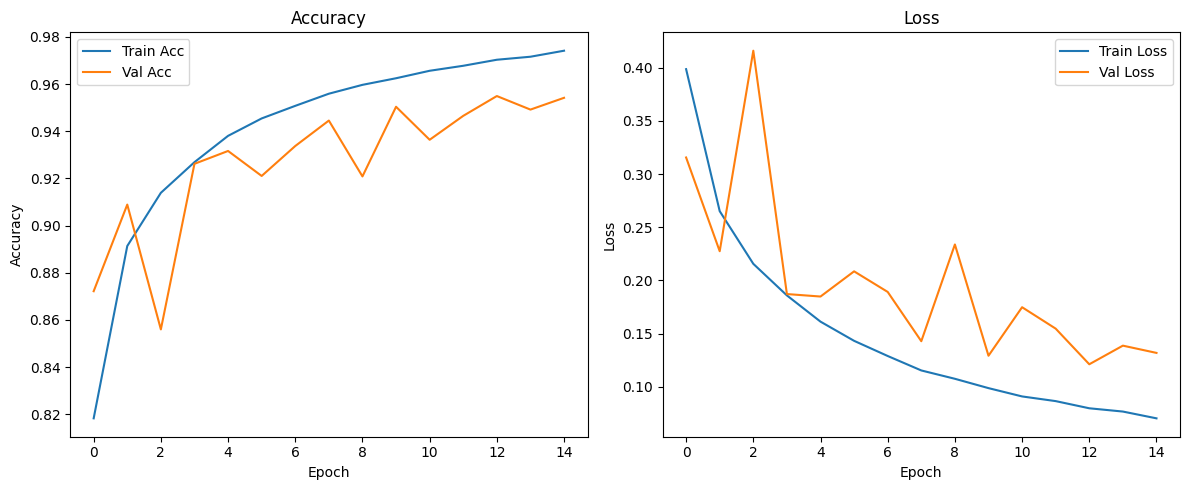

In [11]:
print("Training started at:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

#constants
IMG_SIZE = 128
BATCH_SIZE =32

# Data generator for scaling
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1
    )

#load training data
train_generator = datagen.flow_from_directory(
    "/content/real_fake_faces/real_vs_fake/real-vs-fake/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    '/content/real_fake_faces/real_vs_fake/real-vs-fake/valid',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load test data
test_generator = datagen.flow_from_directory(
    '/content/real_fake_faces/real_vs_fake/real-vs-fake/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important for accurate label prediction mapping
)

# Print out basic info
print("Class indices:", train_generator.class_indices)
print("Train batches:", len(train_generator))
print("Validation batches:", len(val_generator))
print("Test batches:", len(test_generator))


labels = train_generator.classes
class_weights =  compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights= dict(enumerate(class_weights))

# Load the MobileNetV2 base
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


EPOCHS = 15
MODEL_PATH = "/content/drive/MyDrive/deepfake_detector.keras"

checkpoint_cb = ModelCheckpoint(
    filepath=MODEL_PATH,
    monitor="val_accuracy",
    save_best_only=True,
    mode="max")

early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop, checkpoint_cb, lr_scheduler],
    class_weight=class_weights
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

model.save("deepfake_detector.keras")
print(f"Model saved at: deepfake_detector.keras")

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.9653 - loss: 0.0923
Test Accuracy: 0.9584


In [13]:
from sklearn.metrics import classification_report
import numpy as np

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_true, y_pred, target_names=['fake', 'real']))


625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 152ms/step
              precision    recall  f1-score   support

        fake       0.95      0.97      0.96     10000
        real       0.97      0.95      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



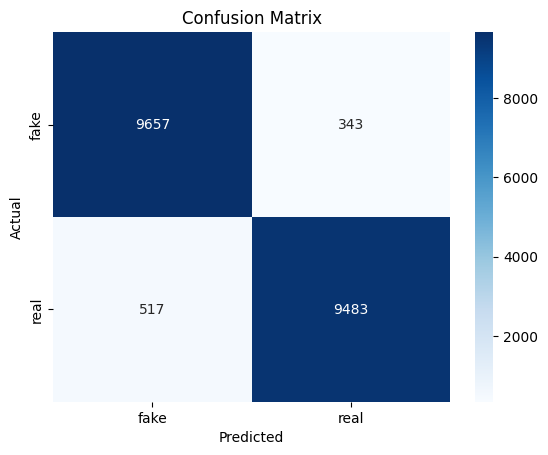

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
!git clone https://github.com/ishan1904/deep-fake-detector.git
%cd deep-fake-detector

Cloning into 'deep-fake-detector'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 19 (delta 6), reused 18 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 142.62 KiB | 715.00 KiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/deep-fake-detector


In [ ]:
!cp /content/drive/MyDrive/train.ipynb ./